In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import os

In [2]:
health_centers = pd.read_excel(os.path.join("..","Data","Original_Files","HRSAData","Data_Explorer_Dataset_v2.xlsx"))
health_centers

Site Name  \
0                            White House Clinic - Irvine   
1      La Clinica School-Based Health Center at Phoen...   
2                                      South Side School   
3                          CHC/SEK Southeast High School   
4      Cornerstone Family Healthcare: The Center for ...   
5                                 Administrative Offices   
6                            Ofu Community Health Center   
7                                            ARcare - 45   
8                       Third Street Primary Care Clinic   
9                RIVER VALLEY PRIMARY CARE SERVICES INC.   
10                 MID LAKES MEDICAL AND DENTAL BUILDING   
11                                    MedLink Oglethorpe   
12                 Knox/Winamac Community Health Centers   
13                      Cantonment Adult and Family Care   
14                      Dorothy Howell Elementary School   
15                          WCHC Hamtramck Health Center   
16                    CENTROMED SOUTH PARK DENTAL CLINIC   
17                                  CHCRR Administration   
18                      La Red Health Center Main Campus   
19                      Community Health Services - Lima   
20                                YOUTH DETENTION CENTER   
21             COMMUNITY HEALTH CENTERS OF SOUTHERN IOWA   
22                           Wellness Pointe - Pine Tree   
23     Jane Pauley Community Health Center at Holy Cr...   
24                         Rural Health Group at Enfield   
25                               Care Connections Clinic   
26                  Student Health &amp; Wellness Center   
27                             Petworth Health Center DC   
28                             Chandler Center for Women   
29                                 Progress Place clinic   
...                                                  ...   
14172                 ISLANDS COMMUNITY MEDICAL SERVICES   
14173                    Jamestown Family Medical Center   
14174                              Midtown Health Center   
14175                       South Central Women's Health   
14176                                    HSNT - Loop 288   
14177          Luis Munoz Marin Elementary School - SBHC   
14178              Priority Health Care - Administration   
14179               Montgomery East Family Health Center   
14180                        North/Kostner Health Center   
14181             Hialeah-Miami Lakes Senior High School   
14182                              THE CHILDREN'S CENTER   
14183                                      Dental Campus   
14184                         Hurtt Family Mobile Clinic   
14185                        San Ysidro Health South Bay   
14186                     COSSMA New Yabucoa Clinic Site   
14187  Generations Family Health Center - School Base...   
14188            FAMILY HEALTH SERVICES - ADMINISTRATION   
14189        East Georgia Healthcare Center, Inc.-Millen   
14190                       La Cumbre Junior High School   
14191                 MOSES LAKE COMMUNITY HEALTH CENTER   
14192                     LUMBERTON FAMILY HEALTH CENTER   
14193  WellSpace Health - Rancho Cordova Community He...   
14194                    Neighborhood Health @ Inglewood   
14195                        Montcalm Area Health Center   
14196               NUESTRA CLINICA DEL VALLE - MERCEDES   
14197                            HopeHealth Greeleyville   
14198                 Palm Center Adult Support Services   
14199                   Springdale Women's Health Center   
14200       Heritage Health Behavioral Health St. Maries   
14201                                 Redondo Elementary   

       Services Delivered at Site                    Health Center Type  \
0                               1                 Service Delivery Site   
1                               1                 Service Delivery Site   
2                               1                 Service Delivery Site   
3                         

In [3]:
health_centers.State.unique()

array(['KY', 'OR', 'CT', 'KS', 'NY', 'WA', 'AS', 'AR', 'IL', 'GA', 'IN',
       'FL', 'MI', 'TX', 'VT', 'DE', 'OH', 'IA', 'NC', 'CA', 'DC', 'AZ',
       'MD', 'NE', 'ID', 'MS', 'AK', 'PA', 'VA', 'LA', 'WI', 'CO', 'OK',
       'TN', 'UT', 'MO', 'HI', 'SC', 'MA', 'WV', 'MT', 'WY', 'NM', 'NV',
       'SD', 'NH', 'ME', 'AL', 'NJ', 'MN', 'ND', 'RI', 'PR', 'FM', 'PW',
       'MH', 'MP', 'VI', 'GU', 'XX'], dtype=object)

In [4]:
provinces = ['AS','PR','FM','PW','MH','MP','VI','GU','XX']
us_health_centers = health_centers[~health_centers.State.isin(provinces)]
us_health_centers

Site Name  \
0                            White House Clinic - Irvine   
1      La Clinica School-Based Health Center at Phoen...   
2                                      South Side School   
3                          CHC/SEK Southeast High School   
4      Cornerstone Family Healthcare: The Center for ...   
5                                 Administrative Offices   
7                                            ARcare - 45   
8                       Third Street Primary Care Clinic   
9                RIVER VALLEY PRIMARY CARE SERVICES INC.   
10                 MID LAKES MEDICAL AND DENTAL BUILDING   
11                                    MedLink Oglethorpe   
12                 Knox/Winamac Community Health Centers   
13                      Cantonment Adult and Family Care   
14                      Dorothy Howell Elementary School   
15                          WCHC Hamtramck Health Center   
16                    CENTROMED SOUTH PARK DENTAL CLINIC   
17                                  CHCRR Administration   
18                      La Red Health Center Main Campus   
19                      Community Health Services - Lima   
20                                YOUTH DETENTION CENTER   
21             COMMUNITY HEALTH CENTERS OF SOUTHERN IOWA   
22                           Wellness Pointe - Pine Tree   
23     Jane Pauley Community Health Center at Holy Cr...   
24                         Rural Health Group at Enfield   
25                               Care Connections Clinic   
26                  Student Health &amp; Wellness Center   
27                             Petworth Health Center DC   
28                             Chandler Center for Women   
29                                 Progress Place clinic   
30          Alcona Health Center Pickford Medical Clinic   
...                                                  ...   
14171                       VALLEY HEALTH - TEAYS VALLEY   
14172                 ISLANDS COMMUNITY MEDICAL SERVICES   
14173                    Jamestown Family Medical Center   
14174                              Midtown Health Center   
14175                       South Central Women's Health   
14176                                    HSNT - Loop 288   
14177          Luis Munoz Marin Elementary School - SBHC   
14178              Priority Health Care - Administration   
14179               Montgomery East Family Health Center   
14180                        North/Kostner Health Center   
14181             Hialeah-Miami Lakes Senior High School   
14182                              THE CHILDREN'S CENTER   
14183                                      Dental Campus   
14184                         Hurtt Family Mobile Clinic   
14185                        San Ysidro Health South Bay   
14187  Generations Family Health Center - School Base...   
14188            FAMILY HEALTH SERVICES - ADMINISTRATION   
14189        East Georgia Healthcare Center, Inc.-Millen   
14190                       La Cumbre Junior High School   
14191                 MOSES LAKE COMMUNITY HEALTH CENTER   
14192                     LUMBERTON FAMILY HEALTH CENTER   
14193  WellSpace Health - Rancho Cordova Community He...   
14194                    Neighborhood Health @ Inglewood   
14195                        Montcalm Area Health Center   
14196               NUESTRA CLINICA DEL VALLE - MERCEDES   
14197                            HopeHealth Greeleyville   
14198                 Palm Center Adult Support Services   
14199                   Springdale Women's Health Center   
14200       Heritage Health Behavioral Health St. Maries   
14201                                 Redondo Elementary   

       Services Delivered at Site                    Health Center Type  \
0                               1                 Service Delivery Site   
1                               1                 Service Delivery Site   
2                               1                 Service Delivery Site   
3                         

In [76]:
countbycounty = us_health_centers['FIPS'].value_counts().rename_axis('FIPS').reset_index(name='current_health_center_count')
countbycounty

FIPS  current_health_center_count
0     06037                          525
1     12086                          234
2     17031                          232
3     06073                          205
4     36005                          151
5     36047                          145
6     06001                          141
7     36061                          128
8     53033                          128
9     48201                           99
10    09009                           98
11    06107                           96
12    25025                           94
13    06065                           94
14    18097                           92
15    06059                           91
16    06085                           90
17    06075                           87
18    09001                           84
19    04013                           81
20    09003                           81
21    42101                           75
22    25009                           68
23    06019                           67
24    41051                           66
25    22071                           65
26    11001                           65
27    15003                           59
28    08031                           58
29    39061                           55
...     ...                          ...
2015  40011                            1
2016  46075                            1
2017  38003                            1
2018  47171                            1
2019  32015                            1
2020  44001                            1
2021  13137                            1
2022  17095                            1
2023  16065                            1
2024  26055                            1
2025  51155                            1
2026  13077                            1
2027  46017                            1
2028  39121                            1
2029  01027                            1
2030  46135                            1
2031  17157                            1
2032  30061                            1
2033  47101                            1
2034  45067                            1
2035  19117                            1
2036  48319                            1
2037  16003                            1
2038  51029                            1
2039  08097                            1
2040  16051                            1
2041  21019                            1
2042  19033                            1
2043  55105                            1
2044  17127                            1

[2045 rows x 2 columns]

In [5]:
us_health_centers_id = us_health_centers.assign(id=(us_health_centers['Site Name'] + '_' + us_health_centers['FIPS']).astype('category').cat.codes)
us_health_centers_id.head()

Site Name  \
0                        White House Clinic - Irvine   
1  La Clinica School-Based Health Center at Phoen...   
2                                  South Side School   
3                      CHC/SEK Southeast High School   
4  Cornerstone Family Healthcare: The Center for ...   

   Services Delivered at Site     Health Center Type  Health Center Type Code  \
0                           1  Service Delivery Site                        1   
1                           1  Service Delivery Site                        1   
2                           1  Service Delivery Site                        1   
3                           1  Service Delivery Site                        1   
4                           1  Service Delivery Site                        1   

  Health Center Location Type  Health Center Location Type Code  \
0                   Permanent                                 1   
1                    Seasonal                                 2   
2                    Seasonal                                 2   
3                    Seasonal                                 2   
4                   Permanent                                 1   

  Health Center Location Setting  Health Center Location Setting Code  \
0         All Other Clinic Types                                    6   
1                         School                                    3   
2                         School                                    3   
3                         School                                    3   
4         All Other Clinic Types                                    6   

                      Health Center Type and Setting  \
0  Service Delivery Site-Permanent-All Other Clin...   
1              Service Delivery Site-Seasonal-School   
2              Service Delivery Site-Seasonal-School   
3              Service Delivery Site-Seasonal-School   
4  Service Delivery Site-Permanent-All Other Clin...   

   Health Center Type and Setting Code  ...  \
0                                   11  ...   
1                                    7  ...   
2                                    7  ...   
3                                    7  ...   
4                                   11  ...   

  Community Health HRSA Grant Subprogram Indicator  \
0                                                1   
1                                                1   
2                                                1   
3                                                1   
4                                                1   

  School Based Health Center HRSA Grant Subprogram Indicator  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

  Public Housing HRSA Grant Subprogram Indicator  \
0                                              0   
1                                              1   
2                                              0   
3                                              0   
4                                              1   

  Health Care for the Homeless HRSA Grant Subprogram Indicator  \
0                                                  0             
1                                                  1             
2                                                  0             
3                                                  0             
4                                                  1             

  U.S. - Mexico Border 100 Kilometer Indicator  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  Health Center Site Population Type

In [6]:
cols_to_move = ['id','Site Name','County','State','FIPS']
us_health_centers_id = us_health_centers_id[ cols_to_move + [ col for col in us_health_centers_id.columns if col not in cols_to_move ] ]
us_health_centers_id

id                                          Site Name  \
0      13180                        White House Clinic - Irvine   
1       7141  La Clinica School-Based Health Center at Phoen...   
2      11402                                  South Side School   
3       1779                      CHC/SEK Southeast High School   
4       3311  Cornerstone Family Healthcare: The Center for ...   
5        487                             Administrative Offices   
7        323                                        ARcare - 45   
8      12167                   Third Street Primary Care Clinic   
9      10225            RIVER VALLEY PRIMARY CARE SERVICES INC.   
10      7720              MID LAKES MEDICAL AND DENTAL BUILDING   
11      8085                                 MedLink Oglethorpe   
12      6885              Knox/Winamac Community Health Centers   
13      2290                   Cantonment Adult and Family Care   
14      3670                   Dorothy Howell Elementary School   
15     12808                       WCHC Hamtramck Health Center   
16      1694                 CENTROMED SOUTH PARK DENTAL CLINIC   
17      1805                               CHCRR Administration   
18      7184                   La Red Health Center Main Campus   
19      3139                   Community Health Services - Lima   
20     13365                             YOUTH DETENTION CENTER   
21      2054          COMMUNITY HEALTH CENTERS OF SOUTHERN IOWA   
22     13050                        Wellness Pointe - Pine Tree   
23      6510  Jane Pauley Community Health Center at Holy Cr...   
24     10518                      Rural Health Group at Enfield   
25      2326                            Care Connections Clinic   
26     11697               Student Health &amp; Wellness Center   
27      9939                          Petworth Health Center DC   
28      2564                          Chandler Center for Women   
29     10119                              Progress Place clinic   
30       578       Alcona Health Center Pickford Medical Clinic   
...      ...                                                ...   
14171  12508                       VALLEY HEALTH - TEAYS VALLEY   
14172   6288                 ISLANDS COMMUNITY MEDICAL SERVICES   
14173   6496                    Jamestown Family Medical Center   
14174   8253                              Midtown Health Center   
14175  11373                       South Central Women's Health   
14176   5564                                    HSNT - Loop 288   
14177   7541          Luis Munoz Marin Elementary School - SBHC   
14178  10111              Priority Health Care - Administration   
14179   8430               Montgomery East Family Health Center   
14180   9053                        North/Kostner Health Center   
14181   5968             Hialeah-Miami Lakes Senior High School   
14182  11889                              THE CHILDREN'S CENTER   
14183   3590                                      Dental Campus   
14184   6195                         Hurtt Family Mobile Clinic   
14185  11055                        San Ysidro Health South Bay   
14187   5046  Generations Family Health Center - School Base...   
14188   4238            FAMILY HEALTH SERVICES - ADMINISTRATION   
14189   3867        East Georgia Healthcare Center, Inc.-Millen   
14190   7160                       La Cumbre Junior High School   
14191   7817                 MOSES LAKE COMMUNITY HEALTH CENTER   
14192   7096                     LUMBERTON FAMILY HEALTH CENTER   
14193  13026  WellSpace Health - Rancho Cordova Community He...   
14194   8821                    Neighborhood Health @ Inglewood   
14195   8419                        Montcalm Area Health Center   
14196   8754               NUESTRA CLINICA DEL VALLE - MERCEDES   
14197   6088                            HopeHealth Greeleyville   
14198   9733                 Palm Center Adult Support Services   
14199  11521                   Springdale Women's Health 

In [7]:
us_health_centers_id.loc[us_health_centers_id.isnull().any(axis=1)]

id                                          Site Name  \
1680   13201                              Whitman-Walker WeWork   
1985      -1                           NATIVE Health of Spokane   
4510      -1  Eisner Health Family Planning Clinic at Metrop...   
5729      -1  Callen-Lorde Community Health Center Mobile Pr...   
10189     -1            Aria Community Health Center - Mobile 1   
10476   9190    OHSU Family Medicine at Richmond Walk-In Clinic   
11081     -1                   Northeast Health Resource Center   
12273  12582                           VPCHC - Clinton OPC Site   

                     County State   FIPS  Services Delivered at Site  \
1680   District of Columbia    DC  11001                           1   
1985         Spokane County    WA    NaN                           1   
4510     Los Angeles County    CA    NaN                           1   
5729        New York County    NY    NaN                           1   
10189          Kings County    CA    NaN                           1   
10476      Multnomah County    OR  41051                           1   
11081         Travis County    TX    NaN                           1   
12273     Vermillion County    IN  18165                           0   

                         Health Center Type  Health Center Type Code  \
1680   Administrative/Service Delivery Site                        2   
1985   Administrative/Service Delivery Site                        2   
4510                  Service Delivery Site                        1   
5729                  Service Delivery Site                        1   
10189                 Service Delivery Site                        1   
10476                 Service Delivery Site                        1   
11081                 Service Delivery Site                        1   
12273                        Administrative                        3   

      Health Center Location Type  Health Center Location Type Code  ...  \
1680                    Permanent                                 1  ...   
1985                    Permanent                                 1  ...   
4510                    Permanent                                 1  ...   
5729                   Mobile Van                                 3  ...   
10189                  Mobile Van                                 3  ...   
10476                   Permanent                                 1  ...   
11081                   Permanent                                 1  ...   
12273                   Permanent                                 1  ...   

      Migrant Health Centers HRSA Grant Subprogram Indicator  \
1680                                                #0/A       
1985                                                #0/A       
4510                                                #0/A       
5729                                                #0/A       
10189                                               #0/A       
10476                                               #0/A       
11081                                               #0/A       
12273                                               #0/A       

       Community Health HRSA Grant Subprogram Indicator  \
1680                                               #0/A   
1985                                               #0/A   
4510                                               #0/A   
5729                                               #0/A   
10189                                              #0/A   
10476                                              #0/A   
11081                                              #0/A   
12273                                              #0/A   

      School Based Health Center HRSA Grant Subprogram Indicator  \
1680                                                #0/A           
1985                                                #0/A           
4510                                                #0/A           
5729                                      

In [8]:
us_health_centers_id = us_health_centers_id.dropna()
us_health_centers_id

id                                          Site Name  \
0      13180                        White House Clinic - Irvine   
1       7141  La Clinica School-Based Health Center at Phoen...   
2      11402                                  South Side School   
3       1779                      CHC/SEK Southeast High School   
4       3311  Cornerstone Family Healthcare: The Center for ...   
5        487                             Administrative Offices   
7        323                                        ARcare - 45   
8      12167                   Third Street Primary Care Clinic   
9      10225            RIVER VALLEY PRIMARY CARE SERVICES INC.   
10      7720              MID LAKES MEDICAL AND DENTAL BUILDING   
11      8085                                 MedLink Oglethorpe   
12      6885              Knox/Winamac Community Health Centers   
13      2290                   Cantonment Adult and Family Care   
14      3670                   Dorothy Howell Elementary School   
15     12808                       WCHC Hamtramck Health Center   
16      1694                 CENTROMED SOUTH PARK DENTAL CLINIC   
17      1805                               CHCRR Administration   
18      7184                   La Red Health Center Main Campus   
19      3139                   Community Health Services - Lima   
20     13365                             YOUTH DETENTION CENTER   
21      2054          COMMUNITY HEALTH CENTERS OF SOUTHERN IOWA   
22     13050                        Wellness Pointe - Pine Tree   
23      6510  Jane Pauley Community Health Center at Holy Cr...   
24     10518                      Rural Health Group at Enfield   
25      2326                            Care Connections Clinic   
26     11697               Student Health &amp; Wellness Center   
27      9939                          Petworth Health Center DC   
28      2564                          Chandler Center for Women   
29     10119                              Progress Place clinic   
30       578       Alcona Health Center Pickford Medical Clinic   
...      ...                                                ...   
14171  12508                       VALLEY HEALTH - TEAYS VALLEY   
14172   6288                 ISLANDS COMMUNITY MEDICAL SERVICES   
14173   6496                    Jamestown Family Medical Center   
14174   8253                              Midtown Health Center   
14175  11373                       South Central Women's Health   
14176   5564                                    HSNT - Loop 288   
14177   7541          Luis Munoz Marin Elementary School - SBHC   
14178  10111              Priority Health Care - Administration   
14179   8430               Montgomery East Family Health Center   
14180   9053                        North/Kostner Health Center   
14181   5968             Hialeah-Miami Lakes Senior High School   
14182  11889                              THE CHILDREN'S CENTER   
14183   3590                                      Dental Campus   
14184   6195                         Hurtt Family Mobile Clinic   
14185  11055                        San Ysidro Health South Bay   
14187   5046  Generations Family Health Center - School Base...   
14188   4238            FAMILY HEALTH SERVICES - ADMINISTRATION   
14189   3867        East Georgia Healthcare Center, Inc.-Millen   
14190   7160                       La Cumbre Junior High School   
14191   7817                 MOSES LAKE COMMUNITY HEALTH CENTER   
14192   7096                     LUMBERTON FAMILY HEALTH CENTER   
14193  13026  WellSpace Health - Rancho Cordova Community He...   
14194   8821                    Neighborhood Health @ Inglewood   
14195   8419                        Montcalm Area Health Center   
14196   8754               NUESTRA CLINICA DEL VALLE - MERCEDES   
14197   6088                            HopeHealth Greeleyville   
14198   9733                 Palm Center Adult Support Services   
14199  11521                   Springdale Women's Health 

In [9]:
blanks = us_health_centers_id[us_health_centers_id['FIPS'] == '     ']
blanks

id                                          Site Name  \
2124    5481                        HIGHLAND WELLNESS HCP ANNEX   
5930    1025  BORREGO COMMUNITY HEALTH FOUNDATION ADMINISTRA...   
13252  10594               SAME DAY CLINIC AT HIGHLAND WELLNESS   

               County State   FIPS  Services Delivered at Site  \
2124   Not Determined    CA                                  1   
5930   Not Determined    CA                                  0   
13252  Not Determined    CA                                  1   

          Health Center Type  Health Center Type Code  \
2124   Service Delivery Site                        1   
5930          Administrative                        3   
13252  Service Delivery Site                        1   

      Health Center Location Type  Health Center Location Type Code  ...  \
2124                    Permanent                                 1  ...   
5930                    Permanent                                 1  ...   
13252                   Permanent                                 1  ...   

      Migrant Health Centers HRSA Grant Subprogram Indicator  \
2124                                                   0       
5930                                                   1       
13252                                                  0       

       Community Health HRSA Grant Subprogram Indicator  \
2124                                                  0   
5930                                                  1   
13252                                                 0   

      School Based Health Center HRSA Grant Subprogram Indicator  \
2124                                                   0           
5930                                                   0           
13252                                                  0           

       Public Housing HRSA Grant Subprogram Indicator  \
2124                                                0   
5930                                                0   
13252                                               0   

      Health Care for the Homeless HRSA Grant Subprogram Indicator  \
2124                                                   1             
5930                                                   0             
13252                                                  1             

      U.S. - Mexico Border 100 Kilometer Indicator  \
2124                                             U   
5930                                             U   
13252                                            U   

      Health Center Site Population Type Description  \
2124                                         Unknown   
5930                                         Unknown   
13252                                          Urban   

      Health Center Site Population Type Code  \
2124                                      4.0   
5930                                      4.0   
13252                                     1.0   

      Health Center Operational Schedule Description  \
2124                                         Unknown   
5930                                         Unknown   
13252                                      Full-Time   

      Health Center Operational Schedule Code  
2124                                      3.0  
5930                                      3.0  
13252                                     1.0  

[3 rows x 24 columns]

In [10]:
us_health_centers_id = us_health_centers_id[us_health_centers_id['FIPS'] != '     '].copy(deep=False)
us_health_centers_id

id                                          Site Name  \
0      13180                        White House Clinic - Irvine   
1       7141  La Clinica School-Based Health Center at Phoen...   
2      11402                                  South Side School   
3       1779                      CHC/SEK Southeast High School   
4       3311  Cornerstone Family Healthcare: The Center for ...   
5        487                             Administrative Offices   
7        323                                        ARcare - 45   
8      12167                   Third Street Primary Care Clinic   
9      10225            RIVER VALLEY PRIMARY CARE SERVICES INC.   
10      7720              MID LAKES MEDICAL AND DENTAL BUILDING   
11      8085                                 MedLink Oglethorpe   
12      6885              Knox/Winamac Community Health Centers   
13      2290                   Cantonment Adult and Family Care   
14      3670                   Dorothy Howell Elementary School   
15     12808                       WCHC Hamtramck Health Center   
16      1694                 CENTROMED SOUTH PARK DENTAL CLINIC   
17      1805                               CHCRR Administration   
18      7184                   La Red Health Center Main Campus   
19      3139                   Community Health Services - Lima   
20     13365                             YOUTH DETENTION CENTER   
21      2054          COMMUNITY HEALTH CENTERS OF SOUTHERN IOWA   
22     13050                        Wellness Pointe - Pine Tree   
23      6510  Jane Pauley Community Health Center at Holy Cr...   
24     10518                      Rural Health Group at Enfield   
25      2326                            Care Connections Clinic   
26     11697               Student Health &amp; Wellness Center   
27      9939                          Petworth Health Center DC   
28      2564                          Chandler Center for Women   
29     10119                              Progress Place clinic   
30       578       Alcona Health Center Pickford Medical Clinic   
...      ...                                                ...   
14171  12508                       VALLEY HEALTH - TEAYS VALLEY   
14172   6288                 ISLANDS COMMUNITY MEDICAL SERVICES   
14173   6496                    Jamestown Family Medical Center   
14174   8253                              Midtown Health Center   
14175  11373                       South Central Women's Health   
14176   5564                                    HSNT - Loop 288   
14177   7541          Luis Munoz Marin Elementary School - SBHC   
14178  10111              Priority Health Care - Administration   
14179   8430               Montgomery East Family Health Center   
14180   9053                        North/Kostner Health Center   
14181   5968             Hialeah-Miami Lakes Senior High School   
14182  11889                              THE CHILDREN'S CENTER   
14183   3590                                      Dental Campus   
14184   6195                         Hurtt Family Mobile Clinic   
14185  11055                        San Ysidro Health South Bay   
14187   5046  Generations Family Health Center - School Base...   
14188   4238            FAMILY HEALTH SERVICES - ADMINISTRATION   
14189   3867        East Georgia Healthcare Center, Inc.-Millen   
14190   7160                       La Cumbre Junior High School   
14191   7817                 MOSES LAKE COMMUNITY HEALTH CENTER   
14192   7096                     LUMBERTON FAMILY HEALTH CENTER   
14193  13026  WellSpace Health - Rancho Cordova Community He...   
14194   8821                    Neighborhood Health @ Inglewood   
14195   8419                        Montcalm Area Health Center   
14196   8754               NUESTRA CLINICA DEL VALLE - MERCEDES   
14197   6088                            HopeHealth Greeleyville   
14198   9733                 Palm Center Adult Support Services   
14199  11521                   Springdale Women's Health 

In [11]:
# us_health_centers_id = us_health_centers_id[us_health_centers_id['Health Center Location Setting'] != 'Correctional Facility'].copy(deep=False)
# us_health_centers_id

id                                          Site Name  \
0      13180                        White House Clinic - Irvine   
1       7141  La Clinica School-Based Health Center at Phoen...   
2      11402                                  South Side School   
3       1779                      CHC/SEK Southeast High School   
4       3311  Cornerstone Family Healthcare: The Center for ...   
5        487                             Administrative Offices   
7        323                                        ARcare - 45   
8      12167                   Third Street Primary Care Clinic   
9      10225            RIVER VALLEY PRIMARY CARE SERVICES INC.   
10      7720              MID LAKES MEDICAL AND DENTAL BUILDING   
11      8085                                 MedLink Oglethorpe   
12      6885              Knox/Winamac Community Health Centers   
13      2290                   Cantonment Adult and Family Care   
14      3670                   Dorothy Howell Elementary School   
15     12808                       WCHC Hamtramck Health Center   
16      1694                 CENTROMED SOUTH PARK DENTAL CLINIC   
17      1805                               CHCRR Administration   
18      7184                   La Red Health Center Main Campus   
19      3139                   Community Health Services - Lima   
21      2054          COMMUNITY HEALTH CENTERS OF SOUTHERN IOWA   
22     13050                        Wellness Pointe - Pine Tree   
23      6510  Jane Pauley Community Health Center at Holy Cr...   
24     10518                      Rural Health Group at Enfield   
25      2326                            Care Connections Clinic   
26     11697               Student Health &amp; Wellness Center   
27      9939                          Petworth Health Center DC   
28      2564                          Chandler Center for Women   
29     10119                              Progress Place clinic   
30       578       Alcona Health Center Pickford Medical Clinic   
31      9320       OneWorld Livestock Campus Livestock Building   
...      ...                                                ...   
14171  12508                       VALLEY HEALTH - TEAYS VALLEY   
14172   6288                 ISLANDS COMMUNITY MEDICAL SERVICES   
14173   6496                    Jamestown Family Medical Center   
14174   8253                              Midtown Health Center   
14175  11373                       South Central Women's Health   
14176   5564                                    HSNT - Loop 288   
14177   7541          Luis Munoz Marin Elementary School - SBHC   
14178  10111              Priority Health Care - Administration   
14179   8430               Montgomery East Family Health Center   
14180   9053                        North/Kostner Health Center   
14181   5968             Hialeah-Miami Lakes Senior High School   
14182  11889                              THE CHILDREN'S CENTER   
14183   3590                                      Dental Campus   
14184   6195                         Hurtt Family Mobile Clinic   
14185  11055                        San Ysidro Health South Bay   
14187   5046  Generations Family Health Center - School Base...   
14188   4238            FAMILY HEALTH SERVICES - ADMINISTRATION   
14189   3867        East Georgia Healthcare Center, Inc.-Millen   
14190   7160                       La Cumbre Junior High School   
14191   7817                 MOSES LAKE COMMUNITY HEALTH CENTER   
14192   7096                     LUMBERTON FAMILY HEALTH CENTER   
14193  13026  WellSpace Health - Rancho Cordova Community He...   
14194   8821                    Neighborhood Health @ Inglewood   
14195   8419                        Montcalm Area Health Center   
14196   8754               NUESTRA CLINICA DEL VALLE - MERCEDES   
14197   6088                            HopeHealth Greeleyville   
14198   9733                 Palm Center Adult Support Services   
14199  11521                   Springdale Women's Health 

In [12]:
# us_health_centers_id = us_health_centers_id[us_health_centers_id['Health Center Location Setting'] != 'Domestic Violence'].copy(deep=False)
# us_health_centers_id

id                                          Site Name  \
0      13180                        White House Clinic - Irvine   
1       7141  La Clinica School-Based Health Center at Phoen...   
2      11402                                  South Side School   
3       1779                      CHC/SEK Southeast High School   
4       3311  Cornerstone Family Healthcare: The Center for ...   
5        487                             Administrative Offices   
7        323                                        ARcare - 45   
8      12167                   Third Street Primary Care Clinic   
9      10225            RIVER VALLEY PRIMARY CARE SERVICES INC.   
10      7720              MID LAKES MEDICAL AND DENTAL BUILDING   
11      8085                                 MedLink Oglethorpe   
12      6885              Knox/Winamac Community Health Centers   
13      2290                   Cantonment Adult and Family Care   
14      3670                   Dorothy Howell Elementary School   
15     12808                       WCHC Hamtramck Health Center   
16      1694                 CENTROMED SOUTH PARK DENTAL CLINIC   
17      1805                               CHCRR Administration   
18      7184                   La Red Health Center Main Campus   
19      3139                   Community Health Services - Lima   
21      2054          COMMUNITY HEALTH CENTERS OF SOUTHERN IOWA   
22     13050                        Wellness Pointe - Pine Tree   
23      6510  Jane Pauley Community Health Center at Holy Cr...   
24     10518                      Rural Health Group at Enfield   
25      2326                            Care Connections Clinic   
26     11697               Student Health &amp; Wellness Center   
27      9939                          Petworth Health Center DC   
28      2564                          Chandler Center for Women   
29     10119                              Progress Place clinic   
30       578       Alcona Health Center Pickford Medical Clinic   
31      9320       OneWorld Livestock Campus Livestock Building   
...      ...                                                ...   
14171  12508                       VALLEY HEALTH - TEAYS VALLEY   
14172   6288                 ISLANDS COMMUNITY MEDICAL SERVICES   
14173   6496                    Jamestown Family Medical Center   
14174   8253                              Midtown Health Center   
14175  11373                       South Central Women's Health   
14176   5564                                    HSNT - Loop 288   
14177   7541          Luis Munoz Marin Elementary School - SBHC   
14178  10111              Priority Health Care - Administration   
14179   8430               Montgomery East Family Health Center   
14180   9053                        North/Kostner Health Center   
14181   5968             Hialeah-Miami Lakes Senior High School   
14182  11889                              THE CHILDREN'S CENTER   
14183   3590                                      Dental Campus   
14184   6195                         Hurtt Family Mobile Clinic   
14185  11055                        San Ysidro Health South Bay   
14187   5046  Generations Family Health Center - School Base...   
14188   4238            FAMILY HEALTH SERVICES - ADMINISTRATION   
14189   3867        East Georgia Healthcare Center, Inc.-Millen   
14190   7160                       La Cumbre Junior High School   
14191   7817                 MOSES LAKE COMMUNITY HEALTH CENTER   
14192   7096                     LUMBERTON FAMILY HEALTH CENTER   
14193  13026  WellSpace Health - Rancho Cordova Community He...   
14194   8821                    Neighborhood Health @ Inglewood   
14195   8419                        Montcalm Area Health Center   
14196   8754               NUESTRA CLINICA DEL VALLE - MERCEDES   
14197   6088                            HopeHealth Greeleyville   
14198   9733                 Palm Center Adult Support Services   
14199  11521                   Springdale Women's Health 

In [13]:
list(us_health_centers_id.columns.values)

['id',
 'Site Name',
 'County',
 'State',
 'FIPS',
 'Services Delivered at Site',
 'Health Center Type',
 'Health Center Type Code',
 'Health Center Location Type',
 'Health Center Location Type Code',
 'Health Center Location Setting',
 'Health Center Location Setting Code',
 'Health Center Type and Setting',
 'Health Center Type and Setting Code',
 'Migrant Health Centers HRSA Grant Subprogram Indicator',
 'Community Health HRSA Grant Subprogram Indicator',
 'School Based Health Center HRSA Grant Subprogram Indicator',
 'Public Housing HRSA Grant Subprogram Indicator',
 'Health Care for the Homeless HRSA Grant Subprogram Indicator',
 'U.S. - Mexico Border 100 Kilometer Indicator',
 'Health Center Site Population Type Description',
 'Health Center Site Population Type Code',
 'Health Center Operational Schedule Description',
 'Health Center Operational Schedule Code']

In [14]:
us_health_centers_id = us_health_centers_id.drop(['Health Center Type',
                'Health Center Location Type',
                'Health Center Location Setting',
                'Health Center Site Population Type Description',
                'Health Center Operational Schedule Description',
                'Health Center Type and Setting'], 
               axis=1)
us_health_centers_id.head()

id                                          Site Name           County  \
0  13180                        White House Clinic - Irvine    Estill County   
1   7141  La Clinica School-Based Health Center at Phoen...   Jackson County   
2  11402                                  South Side School  Hartford County   
3   1779                      CHC/SEK Southeast High School  Crawford County   
4   3311  Cornerstone Family Healthcare: The Center for ...    Orange County   

  State   FIPS  Services Delivered at Site  Health Center Type Code  \
0    KY  21065                           1                        1   
1    OR  41029                           1                        1   
2    CT  09003                           1                        1   
3    KS  20037                           1                        1   
4    NY  36071                           1                        1   

   Health Center Location Type Code  Health Center Location Setting Code  \
0                                 1                                    6   
1                                 2                                    3   
2                                 2                                    3   
3                                 2                                    3   
4                                 1                                    6   

   Health Center Type and Setting Code  \
0                                   11   
1                                    7   
2                                    7   
3                                    7   
4                                   11   

  Migrant Health Centers HRSA Grant Subprogram Indicator  \
0                                                  0       
1                                                  1       
2                                                  0       
3                                                  0       
4                                                  0       

  Community Health HRSA Grant Subprogram Indicator  \
0                                                1   
1                                                1   
2                                                1   
3                                                1   
4                                                1   

  School Based Health Center HRSA Grant Subprogram Indicator  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

  Public Housing HRSA Grant Subprogram Indicator  \
0                                              0   
1                                              1   
2                                              0   
3                                              0   
4                                              1   

  Health Care for the Homeless HRSA Grant Subprogram Indicator  \
0                                                  0             
1                                                  1             
2                                                  0             
3                                                  0             
4                                                  1             

  U.S. - Mexico Border 100 Kilometer Indicator  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Health Center Site Population Type Code  \
0                                      2.0   
1                                      1.0   
2                                      4.0   
3                                      4.0   
4                                      1.0   

   Health Center Operational 

In [15]:
us_health_centers_id.dtypes

id                                                                int16
Site Name                                                        object
County                                                           object
State                                                            object
FIPS                                                             object
Services Delivered at Site                                        int64
Health Center Type Code                                           int64
Health Center Location Type Code                                  int64
Health Center Location Setting Code                               int64
Health Center Type and Setting Code                               int64
Migrant Health Centers HRSA Grant Subprogram Indicator           object
Community Health HRSA Grant Subprogram Indicator                 object
School Based Health Center HRSA Grant Subprogram Indicator       object
Public Housing HRSA Grant Subprogram Indicator                  

In [16]:
us_health_centers_id['FIPS'] = us_health_centers_id['FIPS'].astype(float)
us_health_centers_id['FIPS'] = us_health_centers_id['FIPS'].astype(np.int64).astype(str)
us_health_centers_id.dtypes

id                                                                int16
Site Name                                                        object
County                                                           object
State                                                            object
FIPS                                                             object
Services Delivered at Site                                        int64
Health Center Type Code                                           int64
Health Center Location Type Code                                  int64
Health Center Location Setting Code                               int64
Health Center Type and Setting Code                               int64
Migrant Health Centers HRSA Grant Subprogram Indicator           object
Community Health HRSA Grant Subprogram Indicator                 object
School Based Health Center HRSA Grant Subprogram Indicator       object
Public Housing HRSA Grant Subprogram Indicator                  

In [17]:
all_county_ranks = pd.read_csv(os.path.join("..","Data","Cleaned_Files","All_Years_County_Health_Ranking_Data.csv"))
all_county_ranks

FIPS      State County/Borough/Parish  Year Health_Outcomes_Rank  \
0       1000.0    Alabama                     0  2020                    0   
1       1001.0    Alabama               Autauga  2020                  6.0   
2       1003.0    Alabama               Baldwin  2020                  2.0   
3       1005.0    Alabama               Barbour  2020                 45.0   
4       1007.0    Alabama                  Bibb  2020                 34.0   
5       1009.0    Alabama                Blount  2020                 24.0   
6       1011.0    Alabama               Bullock  2020                 56.0   
7       1013.0    Alabama                Butler  2020                 64.0   
8       1015.0    Alabama               Calhoun  2020                 42.0   
9       1017.0    Alabama              Chambers  2020                 44.0   
10      1019.0    Alabama              Cherokee  2020                 37.0   
11      1021.0    Alabama               Chilton  2020                 15.0   
12      1023.0    Alabama               Choctaw  2020                 52.0   
13      1025.0    Alabama                Clarke  2020                 49.0   
14      1027.0    Alabama                  Clay  2020                 25.0   
15      1029.0    Alabama              Cleburne  2020                 21.0   
16      1031.0    Alabama                Coffee  2020                  4.0   
17      1033.0    Alabama               Colbert  2020                 20.0   
18      1035.0    Alabama               Conecuh  2020                 53.0   
19      1037.0    Alabama                 Coosa  2020                 55.0   
20      1039.0    Alabama             Covington  2020                 38.0   
21      1041.0    Alabama              Crenshaw  2020                 18.0   
22      1043.0    Alabama               Cullman  2020                 16.0   
23      1045.0    Alabama                  Dale  2020                 23.0   
24      1047.0    Alabama                Dallas  2020                 65.0   
25      1049.0    Alabama                DeKalb  2020                 29.0   
26      1051.0    Alabama                Elmore  2020                  8.0   
27      1053.0    Alabama              Escambia  2020                 50.0   
28      1055.0    Alabama                Etowah  2020                 39.0   
29      1057.0    Alabama               Fayette  2020                 19.0   
...        ...        ...                   ...   ...                  ...   
19120  55131.0  Wisconsin            Washington  2015                 12.0   
19121  55133.0  Wisconsin              Waukesha  2015                 14.0   
19122  55135.0  Wisconsin               Waupaca  2015                 55.0   
19123  55137.0  Wisconsin              Waushara  2015                 60.0   
19124  55139.0  Wisconsin             Winnebago  2015                 42.0   
19125  55141.0  Wisconsin                  Wood  2015                 16.0   
19126  56000.0    Wyoming                     0  2015                    0   
19127  56001.0    Wyoming                Albany  2015                  7.0   
19128  56003.0    Wyoming              Big Horn  2015                 10.0   
19129  56005.0    Wyoming              Campbell  2015                 11.0   
19130  56007.0    Wyoming                Carbon  2015                 14.0   
19131  56009.0    Wyoming              Converse  2015                 12.0   
19132  56011.0    Wyoming                 Crook  2015                  6.0   
19133  56013.0    Wyoming               Fremont  2015                 23.0   
19134  56015.0    Wyoming                Goshen  2015                  9.0   
19135  56017.0    Wyoming           Hot Springs  2015                 22.0   
19136  56019.0    Wyoming               Johnson  2015                  4.0   
19137  56021.0    Wyoming               Laramie  2015                 16.0   
19138  56023.0    Wyoming               Lincoln  2015                  8.0   
19139  56025.0    Wyoming       

In [77]:
all_county_ranks = pd.merge(all_county_ranks, countbycounty, on='FIPS', how='left')
all_county_ranks

FIPS      State County/Borough/Parish  Year Health_Outcomes_Rank  \
0       1000    Alabama                     0  2020                    0   
1       1001    Alabama               Autauga  2020                  6.0   
2       1003    Alabama               Baldwin  2020                  2.0   
3       1005    Alabama               Barbour  2020                 45.0   
4       1007    Alabama                  Bibb  2020                 34.0   
5       1009    Alabama                Blount  2020                 24.0   
6       1011    Alabama               Bullock  2020                 56.0   
7       1013    Alabama                Butler  2020                 64.0   
8       1015    Alabama               Calhoun  2020                 42.0   
9       1017    Alabama              Chambers  2020                 44.0   
10      1019    Alabama              Cherokee  2020                 37.0   
11      1021    Alabama               Chilton  2020                 15.0   
12      1023    Alabama               Choctaw  2020                 52.0   
13      1025    Alabama                Clarke  2020                 49.0   
14      1027    Alabama                  Clay  2020                 25.0   
15      1029    Alabama              Cleburne  2020                 21.0   
16      1031    Alabama                Coffee  2020                  4.0   
17      1033    Alabama               Colbert  2020                 20.0   
18      1035    Alabama               Conecuh  2020                 53.0   
19      1037    Alabama                 Coosa  2020                 55.0   
20      1039    Alabama             Covington  2020                 38.0   
21      1041    Alabama              Crenshaw  2020                 18.0   
22      1043    Alabama               Cullman  2020                 16.0   
23      1045    Alabama                  Dale  2020                 23.0   
24      1047    Alabama                Dallas  2020                 65.0   
25      1049    Alabama                DeKalb  2020                 29.0   
26      1051    Alabama                Elmore  2020                  8.0   
27      1053    Alabama              Escambia  2020                 50.0   
28      1055    Alabama                Etowah  2020                 39.0   
29      1057    Alabama               Fayette  2020                 19.0   
...      ...        ...                   ...   ...                  ...   
19120  55131  Wisconsin            Washington  2015                 12.0   
19121  55133  Wisconsin              Waukesha  2015                 14.0   
19122  55135  Wisconsin               Waupaca  2015                 55.0   
19123  55137  Wisconsin              Waushara  2015                 60.0   
19124  55139  Wisconsin             Winnebago  2015                 42.0   
19125  55141  Wisconsin                  Wood  2015                 16.0   
19126  56000    Wyoming                     0  2015                    0   
19127  56001    Wyoming                Albany  2015                  7.0   
19128  56003    Wyoming              Big Horn  2015                 10.0   
19129  56005    Wyoming              Campbell  2015                 11.0   
19130  56007    Wyoming                Carbon  2015                 14.0   
19131  56009    Wyoming              Converse  2015                 12.0   
19132  56011    Wyoming                 Crook  2015                  6.0   
19133  56013    Wyoming               Fremont  2015                 23.0   
19134  56015    Wyoming                Goshen  2015                  9.0   
19135  56017    Wyoming           Hot Springs  2015                 22.0   
19136  56019    Wyoming               Johnson  2015                  4.0   
19137  56021    Wyoming               Laramie  2015                 16.0   
19138  56023    Wyoming               Lincoln  2015                  8.0   
19139  56025    Wyoming               Natrona  2015                 18.0   
19140  56027    Wyoming              Niobrara  2015     

In [78]:
all_county_ranks.count()

FIPS                                                  19150
State                                                 19150
County/Borough/Parish                                 19150
Year                                                  19150
Health_Outcomes_Rank                                  19150
Yrs_Potential_Life_Lost_per_100K                      19150
Percent_Fair_Poor_Health                              19150
Percent_Low_Birthweight_Births                        19150
Percent_Adult_Smokers                                 19150
Percent_Adult_Obesity                                 19150
Healthy_Food_Access_Index                             19150
Percent_Adults_Physical_Inactivity                    19150
Percent_Access_to_Excercise_Opportunities             19150
Percent_Adults_Excessive_Drinking                     19150
Percent_Driving_Deaths_with_Alcohol_Involvement       19150
Chlamydia_Cases_per_100K                              19150
Teen_Birth_Rate                         

In [88]:
all_county_ranks['current_health_center_count'].fillna(0, inplace = True) 
all_county_ranks

FIPS      State County/Borough/Parish  Year Health_Outcomes_Rank  \
0       1000    Alabama                     0  2020                    0   
1       1001    Alabama               Autauga  2020                  6.0   
2       1003    Alabama               Baldwin  2020                  2.0   
3       1005    Alabama               Barbour  2020                 45.0   
4       1007    Alabama                  Bibb  2020                 34.0   
5       1009    Alabama                Blount  2020                 24.0   
6       1011    Alabama               Bullock  2020                 56.0   
7       1013    Alabama                Butler  2020                 64.0   
8       1015    Alabama               Calhoun  2020                 42.0   
9       1017    Alabama              Chambers  2020                 44.0   
10      1019    Alabama              Cherokee  2020                 37.0   
11      1021    Alabama               Chilton  2020                 15.0   
12      1023    Alabama               Choctaw  2020                 52.0   
13      1025    Alabama                Clarke  2020                 49.0   
14      1027    Alabama                  Clay  2020                 25.0   
15      1029    Alabama              Cleburne  2020                 21.0   
16      1031    Alabama                Coffee  2020                  4.0   
17      1033    Alabama               Colbert  2020                 20.0   
18      1035    Alabama               Conecuh  2020                 53.0   
19      1037    Alabama                 Coosa  2020                 55.0   
20      1039    Alabama             Covington  2020                 38.0   
21      1041    Alabama              Crenshaw  2020                 18.0   
22      1043    Alabama               Cullman  2020                 16.0   
23      1045    Alabama                  Dale  2020                 23.0   
24      1047    Alabama                Dallas  2020                 65.0   
25      1049    Alabama                DeKalb  2020                 29.0   
26      1051    Alabama                Elmore  2020                  8.0   
27      1053    Alabama              Escambia  2020                 50.0   
28      1055    Alabama                Etowah  2020                 39.0   
29      1057    Alabama               Fayette  2020                 19.0   
...      ...        ...                   ...   ...                  ...   
19120  55131  Wisconsin            Washington  2015                 12.0   
19121  55133  Wisconsin              Waukesha  2015                 14.0   
19122  55135  Wisconsin               Waupaca  2015                 55.0   
19123  55137  Wisconsin              Waushara  2015                 60.0   
19124  55139  Wisconsin             Winnebago  2015                 42.0   
19125  55141  Wisconsin                  Wood  2015                 16.0   
19126  56000    Wyoming                     0  2015                    0   
19127  56001    Wyoming                Albany  2015                  7.0   
19128  56003    Wyoming              Big Horn  2015                 10.0   
19129  56005    Wyoming              Campbell  2015                 11.0   
19130  56007    Wyoming                Carbon  2015                 14.0   
19131  56009    Wyoming              Converse  2015                 12.0   
19132  56011    Wyoming                 Crook  2015                  6.0   
19133  56013    Wyoming               Fremont  2015                 23.0   
19134  56015    Wyoming                Goshen  2015                  9.0   
19135  56017    Wyoming           Hot Springs  2015                 22.0   
19136  56019    Wyoming               Johnson  2015                  4.0   
19137  56021    Wyoming               Laramie  2015                 16.0   
19138  56023    Wyoming               Lincoln  2015                  8.0   
19139  56025    Wyoming               Natrona  2015                 18.0   
19140  56027    Wyoming              Niobrara  2015     

In [92]:
all_county_ranks.to_csv(os.path.join("..","Data","Cleaned_Files","All_Years_County_Health_Ranking_Data.csv"), index=False)

In [18]:
all_county_ranks['FIPS'] = all_county_ranks['FIPS'].astype(np.int64).astype(str)
all_county_ranks.dtypes

FIPS                                                   object
State                                                  object
County/Borough/Parish                                  object
Year                                                    int64
Health_Outcomes_Rank                                   object
Yrs_Potential_Life_Lost_per_100K                      float64
Percent_Fair_Poor_Health                              float64
Percent_Low_Birthweight_Births                        float64
Percent_Adult_Smokers                                 float64
Percent_Adult_Obesity                                 float64
Healthy_Food_Access_Index                             float64
Percent_Adults_Physical_Inactivity                    float64
Percent_Access_to_Excercise_Opportunities             float64
Percent_Adults_Excessive_Drinking                     float64
Percent_Driving_Deaths_with_Alcohol_Involvement       float64
Chlamydia_Cases_per_100K                              float64
Teen_Bir

In [19]:
all_county_ranks_2020 = all_county_ranks[all_county_ranks['Year'] == 2020].copy(deep=False)
all_county_ranks_2020

FIPS      State County/Borough/Parish  Year Health_Outcomes_Rank  \
0      1000    Alabama                     0  2020                    0   
1      1001    Alabama               Autauga  2020                  6.0   
2      1003    Alabama               Baldwin  2020                  2.0   
3      1005    Alabama               Barbour  2020                 45.0   
4      1007    Alabama                  Bibb  2020                 34.0   
5      1009    Alabama                Blount  2020                 24.0   
6      1011    Alabama               Bullock  2020                 56.0   
7      1013    Alabama                Butler  2020                 64.0   
8      1015    Alabama               Calhoun  2020                 42.0   
9      1017    Alabama              Chambers  2020                 44.0   
10     1019    Alabama              Cherokee  2020                 37.0   
11     1021    Alabama               Chilton  2020                 15.0   
12     1023    Alabama               Choctaw  2020                 52.0   
13     1025    Alabama                Clarke  2020                 49.0   
14     1027    Alabama                  Clay  2020                 25.0   
15     1029    Alabama              Cleburne  2020                 21.0   
16     1031    Alabama                Coffee  2020                  4.0   
17     1033    Alabama               Colbert  2020                 20.0   
18     1035    Alabama               Conecuh  2020                 53.0   
19     1037    Alabama                 Coosa  2020                 55.0   
20     1039    Alabama             Covington  2020                 38.0   
21     1041    Alabama              Crenshaw  2020                 18.0   
22     1043    Alabama               Cullman  2020                 16.0   
23     1045    Alabama                  Dale  2020                 23.0   
24     1047    Alabama                Dallas  2020                 65.0   
25     1049    Alabama                DeKalb  2020                 29.0   
26     1051    Alabama                Elmore  2020                  8.0   
27     1053    Alabama              Escambia  2020                 50.0   
28     1055    Alabama                Etowah  2020                 39.0   
29     1057    Alabama               Fayette  2020                 19.0   
...     ...        ...                   ...   ...                  ...   
3163  55131  Wisconsin            Washington  2020                  3.0   
3164  55133  Wisconsin              Waukesha  2020                  4.0   
3165  55135  Wisconsin               Waupaca  2020                 43.0   
3166  55137  Wisconsin              Waushara  2020                 48.0   
3167  55139  Wisconsin             Winnebago  2020                 42.0   
3168  55141  Wisconsin                  Wood  2020                 53.0   
3169  56000    Wyoming                     0  2020                    0   
3170  56001    Wyoming                Albany  2020                 13.0   
3171  56003    Wyoming              Big Horn  2020                 15.0   
3172  56005    Wyoming              Campbell  2020                  7.0   
3173  56007    Wyoming                Carbon  2020                 22.0   
3174  56009    Wyoming              Converse  2020                 17.0   
3175  56011    Wyoming                 Crook  2020                  2.0   
3176  56013    Wyoming               Fremont  2020                 23.0   
3177  56015    Wyoming                Goshen  2020                 10.0   
3178  56017    Wyoming           Hot Springs  2020                 20.0   
3179  56019    Wyoming               Johnson  2020                  8.0   
3180  56021    Wyoming               Laramie  2020                 12.0   
3181  56023    Wyoming               Lincoln  2020                  5.0   
3182  56025    Wyoming               Natrona  2020                 16.0   
3183  56027    Wyoming              Niobrara  2020                 18.0   
3184  56029    Wyoming          

In [20]:
health_centers_county_rank = pd.merge(us_health_centers_id, all_county_ranks_2020, on='FIPS', how='left')
health_centers_county_rank

id                                          Site Name  \
0      13180                        White House Clinic - Irvine   
1       7141  La Clinica School-Based Health Center at Phoen...   
2      11402                                  South Side School   
3       1779                      CHC/SEK Southeast High School   
4       3311  Cornerstone Family Healthcare: The Center for ...   
5        487                             Administrative Offices   
6        323                                        ARcare - 45   
7      12167                   Third Street Primary Care Clinic   
8      10225            RIVER VALLEY PRIMARY CARE SERVICES INC.   
9       7720              MID LAKES MEDICAL AND DENTAL BUILDING   
10      8085                                 MedLink Oglethorpe   
11      6885              Knox/Winamac Community Health Centers   
12      2290                   Cantonment Adult and Family Care   
13      3670                   Dorothy Howell Elementary School   
14     12808                       WCHC Hamtramck Health Center   
15      1694                 CENTROMED SOUTH PARK DENTAL CLINIC   
16      1805                               CHCRR Administration   
17      7184                   La Red Health Center Main Campus   
18      3139                   Community Health Services - Lima   
19      2054          COMMUNITY HEALTH CENTERS OF SOUTHERN IOWA   
20     13050                        Wellness Pointe - Pine Tree   
21      6510  Jane Pauley Community Health Center at Holy Cr...   
22     10518                      Rural Health Group at Enfield   
23      2326                            Care Connections Clinic   
24     11697               Student Health &amp; Wellness Center   
25      9939                          Petworth Health Center DC   
26      2564                          Chandler Center for Women   
27     10119                              Progress Place clinic   
28       578       Alcona Health Center Pickford Medical Clinic   
29      9320       OneWorld Livestock Campus Livestock Building   
...      ...                                                ...   
13935  12508                       VALLEY HEALTH - TEAYS VALLEY   
13936   6288                 ISLANDS COMMUNITY MEDICAL SERVICES   
13937   6496                    Jamestown Family Medical Center   
13938   8253                              Midtown Health Center   
13939  11373                       South Central Women's Health   
13940   5564                                    HSNT - Loop 288   
13941   7541          Luis Munoz Marin Elementary School - SBHC   
13942  10111              Priority Health Care - Administration   
13943   8430               Montgomery East Family Health Center   
13944   9053                        North/Kostner Health Center   
13945   5968             Hialeah-Miami Lakes Senior High School   
13946  11889                              THE CHILDREN'S CENTER   
13947   3590                                      Dental Campus   
13948   6195                         Hurtt Family Mobile Clinic   
13949  11055                        San Ysidro Health South Bay   
13950   5046  Generations Family Health Center - School Base...   
13951   4238            FAMILY HEALTH SERVICES - ADMINISTRATION   
13952   3867        East Georgia Healthcare Center, Inc.-Millen   
13953   7160                       La Cumbre Junior High School   
13954   7817                 MOSES LAKE COMMUNITY HEALTH CENTER   
13955   7096                     LUMBERTON FAMILY HEALTH CENTER   
13956  13026  WellSpace Health - Rancho Cordova Community He...   
13957   8821                    Neighborhood Health @ Inglewood   
13958   8419                        Montcalm Area Health Center   
13959   8754               NUESTRA CLINICA DEL VALLE - MERCEDES   
13960   6088                            HopeHealth Greeleyville   
13961   9733                 Palm Center Adult Support Services   
13962  11521                   Springdale Women's Health 

In [21]:
health_centers_county_rank.loc[health_centers_county_rank.isnull().any(axis=1)]

id                        Site Name         County State_x   FIPS  \
10885  3915  Eastern Community Health Center  Ingham County      MI  70150   

       Services Delivered at Site  Health Center Type Code  \
10885                           1                        1   

       Health Center Location Type Code  Health Center Location Setting Code  \
10885                                 1                                    3   

       Health Center Type and Setting Code  ...  \
10885                                    5  ...   

      Percent_Native_Hawaiian_Other_Pacific_Islander Number_Hispanic  \
10885                                            NaN             NaN   

      Percent_Hispanic Number_Non-Hispanic_White Percent_Non-Hispanic_White  \
10885              NaN                       NaN                        NaN   

      Number_Not_Proficient_in_English  Percent_Not_Proficient_in_English  \
10885                              NaN                                NaN   

       Percent_Female Number_Pop_Living_in_Rural_Area Percent_Rural  
10885             NaN                             NaN           NaN  

[1 rows x 87 columns]

In [22]:
health_centers_county_rank = health_centers_county_rank.dropna()
health_centers_county_rank

id                                          Site Name  \
0      13180                        White House Clinic - Irvine   
1       7141  La Clinica School-Based Health Center at Phoen...   
2      11402                                  South Side School   
3       1779                      CHC/SEK Southeast High School   
4       3311  Cornerstone Family Healthcare: The Center for ...   
5        487                             Administrative Offices   
6        323                                        ARcare - 45   
7      12167                   Third Street Primary Care Clinic   
8      10225            RIVER VALLEY PRIMARY CARE SERVICES INC.   
9       7720              MID LAKES MEDICAL AND DENTAL BUILDING   
10      8085                                 MedLink Oglethorpe   
11      6885              Knox/Winamac Community Health Centers   
12      2290                   Cantonment Adult and Family Care   
13      3670                   Dorothy Howell Elementary School   
14     12808                       WCHC Hamtramck Health Center   
15      1694                 CENTROMED SOUTH PARK DENTAL CLINIC   
16      1805                               CHCRR Administration   
17      7184                   La Red Health Center Main Campus   
18      3139                   Community Health Services - Lima   
19      2054          COMMUNITY HEALTH CENTERS OF SOUTHERN IOWA   
20     13050                        Wellness Pointe - Pine Tree   
21      6510  Jane Pauley Community Health Center at Holy Cr...   
22     10518                      Rural Health Group at Enfield   
23      2326                            Care Connections Clinic   
24     11697               Student Health &amp; Wellness Center   
25      9939                          Petworth Health Center DC   
26      2564                          Chandler Center for Women   
27     10119                              Progress Place clinic   
28       578       Alcona Health Center Pickford Medical Clinic   
29      9320       OneWorld Livestock Campus Livestock Building   
...      ...                                                ...   
13935  12508                       VALLEY HEALTH - TEAYS VALLEY   
13936   6288                 ISLANDS COMMUNITY MEDICAL SERVICES   
13937   6496                    Jamestown Family Medical Center   
13938   8253                              Midtown Health Center   
13939  11373                       South Central Women's Health   
13940   5564                                    HSNT - Loop 288   
13941   7541          Luis Munoz Marin Elementary School - SBHC   
13942  10111              Priority Health Care - Administration   
13943   8430               Montgomery East Family Health Center   
13944   9053                        North/Kostner Health Center   
13945   5968             Hialeah-Miami Lakes Senior High School   
13946  11889                              THE CHILDREN'S CENTER   
13947   3590                                      Dental Campus   
13948   6195                         Hurtt Family Mobile Clinic   
13949  11055                        San Ysidro Health South Bay   
13950   5046  Generations Family Health Center - School Base...   
13951   4238            FAMILY HEALTH SERVICES - ADMINISTRATION   
13952   3867        East Georgia Healthcare Center, Inc.-Millen   
13953   7160                       La Cumbre Junior High School   
13954   7817                 MOSES LAKE COMMUNITY HEALTH CENTER   
13955   7096                     LUMBERTON FAMILY HEALTH CENTER   
13956  13026  WellSpace Health - Rancho Cordova Community He...   
13957   8821                    Neighborhood Health @ Inglewood   
13958   8419                        Montcalm Area Health Center   
13959   8754               NUESTRA CLINICA DEL VALLE - MERCEDES   
13960   6088                            HopeHealth Greeleyville   
13961   9733                 Palm Center Adult Support Services   
13962  11521                   Springdale Women's Health 

In [23]:
centers_with_county_ranks = health_centers_county_rank[(health_centers_county_rank.Health_Outcomes_Rank != 'NR')].copy(deep=False)
centers_with_county_ranks

id                                          Site Name  \
0      13180                        White House Clinic - Irvine   
1       7141  La Clinica School-Based Health Center at Phoen...   
2      11402                                  South Side School   
3       1779                      CHC/SEK Southeast High School   
4       3311  Cornerstone Family Healthcare: The Center for ...   
5        487                             Administrative Offices   
6        323                                        ARcare - 45   
7      12167                   Third Street Primary Care Clinic   
8      10225            RIVER VALLEY PRIMARY CARE SERVICES INC.   
9       7720              MID LAKES MEDICAL AND DENTAL BUILDING   
10      8085                                 MedLink Oglethorpe   
11      6885              Knox/Winamac Community Health Centers   
12      2290                   Cantonment Adult and Family Care   
13      3670                   Dorothy Howell Elementary School   
14     12808                       WCHC Hamtramck Health Center   
15      1694                 CENTROMED SOUTH PARK DENTAL CLINIC   
16      1805                               CHCRR Administration   
17      7184                   La Red Health Center Main Campus   
18      3139                   Community Health Services - Lima   
19      2054          COMMUNITY HEALTH CENTERS OF SOUTHERN IOWA   
20     13050                        Wellness Pointe - Pine Tree   
21      6510  Jane Pauley Community Health Center at Holy Cr...   
22     10518                      Rural Health Group at Enfield   
23      2326                            Care Connections Clinic   
24     11697               Student Health &amp; Wellness Center   
25      9939                          Petworth Health Center DC   
26      2564                          Chandler Center for Women   
27     10119                              Progress Place clinic   
28       578       Alcona Health Center Pickford Medical Clinic   
29      9320       OneWorld Livestock Campus Livestock Building   
...      ...                                                ...   
13935  12508                       VALLEY HEALTH - TEAYS VALLEY   
13936   6288                 ISLANDS COMMUNITY MEDICAL SERVICES   
13937   6496                    Jamestown Family Medical Center   
13938   8253                              Midtown Health Center   
13939  11373                       South Central Women's Health   
13940   5564                                    HSNT - Loop 288   
13941   7541          Luis Munoz Marin Elementary School - SBHC   
13942  10111              Priority Health Care - Administration   
13943   8430               Montgomery East Family Health Center   
13944   9053                        North/Kostner Health Center   
13945   5968             Hialeah-Miami Lakes Senior High School   
13946  11889                              THE CHILDREN'S CENTER   
13947   3590                                      Dental Campus   
13948   6195                         Hurtt Family Mobile Clinic   
13949  11055                        San Ysidro Health South Bay   
13950   5046  Generations Family Health Center - School Base...   
13951   4238            FAMILY HEALTH SERVICES - ADMINISTRATION   
13952   3867        East Georgia Healthcare Center, Inc.-Millen   
13953   7160                       La Cumbre Junior High School   
13954   7817                 MOSES LAKE COMMUNITY HEALTH CENTER   
13955   7096                     LUMBERTON FAMILY HEALTH CENTER   
13956  13026  WellSpace Health - Rancho Cordova Community He...   
13957   8821                    Neighborhood Health @ Inglewood   
13958   8419                        Montcalm Area Health Center   
13959   8754               NUESTRA CLINICA DEL VALLE - MERCEDES   
13960   6088                            HopeHealth Greeleyville   
13961   9733                 Palm Center Adult Support Services   
13962  11521                   Springdale Women's Health 

In [24]:
centers_with_county_ranks.dtypes

id                                                                int16
Site Name                                                        object
County                                                           object
State_x                                                          object
FIPS                                                             object
Services Delivered at Site                                        int64
Health Center Type Code                                           int64
Health Center Location Type Code                                  int64
Health Center Location Setting Code                               int64
Health Center Type and Setting Code                               int64
Migrant Health Centers HRSA Grant Subprogram Indicator           object
Community Health HRSA Grant Subprogram Indicator                 object
School Based Health Center HRSA Grant Subprogram Indicator       object
Public Housing HRSA Grant Subprogram Indicator                  

In [25]:
centers_with_county_ranks['Migrant Health Centers HRSA Grant Subprogram Indicator'].unique()

array([0, 1, ' '], dtype=object)

In [26]:
centers_with_county_ranks['Community Health HRSA Grant Subprogram Indicator'].unique()

array([1, ' ', 0], dtype=object)

In [27]:
centers_with_county_ranks['School Based Health Center HRSA Grant Subprogram Indicator'].unique()

array([0, ' '], dtype=object)

In [28]:
centers_with_county_ranks['Public Housing HRSA Grant Subprogram Indicator'].unique()

array([0, 1, ' '], dtype=object)

In [29]:
centers_with_county_ranks['Health Care for the Homeless HRSA Grant Subprogram Indicator'].unique()

array([0, 1, ' '], dtype=object)

In [30]:
remove_blanks = lambda x: 1 if x == 1 else 0
centers_with_county_ranks['Migrant Health Centers HRSA Grant Subprogram Indicator'] = centers_with_county_ranks['Migrant Health Centers HRSA Grant Subprogram Indicator'].apply(remove_blanks)
centers_with_county_ranks['Community Health HRSA Grant Subprogram Indicator'] = centers_with_county_ranks['Community Health HRSA Grant Subprogram Indicator'].apply(remove_blanks)
centers_with_county_ranks['School Based Health Center HRSA Grant Subprogram Indicator'] = centers_with_county_ranks['School Based Health Center HRSA Grant Subprogram Indicator'].apply(remove_blanks)
centers_with_county_ranks['Public Housing HRSA Grant Subprogram Indicator'] = centers_with_county_ranks['Public Housing HRSA Grant Subprogram Indicator'].apply(remove_blanks)
centers_with_county_ranks['Health Care for the Homeless HRSA Grant Subprogram Indicator'] = centers_with_county_ranks['Health Care for the Homeless HRSA Grant Subprogram Indicator'].apply(remove_blanks)

In [31]:
centers_with_county_ranks['Percent_Racial_Ethnic_Minority'] = centers_with_county_ranks['Percent_Non-Hispanic_Black_or_African_American'] + centers_with_county_ranks['Percent_American_Indian_or_Alaskan_Native'] + centers_with_county_ranks['Percent_Asian'] + centers_with_county_ranks['Percent_Native_Hawaiian_Other_Pacific_Islander'] + centers_with_county_ranks['Percent_Hispanic']

In [32]:
centers_with_county_ranks.dtypes

id                                                                int16
Site Name                                                        object
County                                                           object
State_x                                                          object
FIPS                                                             object
Services Delivered at Site                                        int64
Health Center Type Code                                           int64
Health Center Location Type Code                                  int64
Health Center Location Setting Code                               int64
Health Center Type and Setting Code                               int64
Migrant Health Centers HRSA Grant Subprogram Indicator            int64
Community Health HRSA Grant Subprogram Indicator                  int64
School Based Health Center HRSA Grant Subprogram Indicator        int64
Public Housing HRSA Grant Subprogram Indicator                  

In [54]:
centers_with_county_ranks = centers_with_county_ranks.drop(['id', 'Site Name'], axis=1)
centers_with_county_ranks

County State_x   FIPS  Services Delivered at Site  \
0             Estill County      KY  21065                           1   
1            Jackson County      OR  41029                           1   
2           Hartford County      CT   9003                           1   
3           Crawford County      KS  20037                           1   
4             Orange County      NY  36071                           1   
5             Pierce County      WA  53053                           0   
6            Jackson County      AR   5067                           1   
7           New York County      NY  36061                           1   
8              Logan County      AR   5083                           1   
9               Lake County      IL  17097                           1   
10        Oglethorpe County      GA  13221                           1   
11            Starke County      IN  18149                           1   
12          Escambia County      FL  12033                           1   
13            Kenton County      KY  21117                           1   
14             Wayne County      MI  26163                           1   
15             Bexar County      TX  48029                           1   
16           Rutland County      VT  50021                           0   
17            Sussex County      DE  10005                           1   
18             Allen County      OH  39003                           1   
19           Decatur County      IA  19053                           1   
20             Gregg County      TX  48183                           1   
21           Madison County      IN  18095                           1   
22           Halifax County      NC  37083                           1   
23            Travis County      TX  48453                           1   
24       Los Angeles County      CA   6037                           1   
25     District of Columbia      DC  11001                           1   
26          Maricopa County      AZ   4013                           1   
27        Montgomery County      MD  24031                           1   
28          Chippewa County      MI  26033                           1   
29           Douglas County      NE  31055                           1   
...                     ...     ...    ...                         ...   
13935         Putnam County      WV  54079                           1   
13936           Knox County      ME  23013                           1   
13937        Russell County      KY  21207                           1   
13938        Madison County      NE   4013                           1   
13939       Ben Hill County      GA  13017                           1   
13940         Denton County      TX  48121                           1   
13941      Fairfield County      CT   9001                           1   
13942      Jefferson Parish      LA  22051                           0   
13943     Montgomery County      AL   1101                           1   
13944           Cook County      IL  17031                           1   
13945     Miami-Dade County      FL  12086                           1   
13946      Greenwood County      SC  45047                           1   
13947         Sonoma County      CA   6097                           1   
13948         Orange County      CA   6059                           1   
13949      San Diego County      CA   6073                           1   
13950        Windham County      CT   9015                           1   
13951     Twin Falls County      ID  16083                           1   
13952        Jenkins County      GA  13165                           1   
13953  Santa Barbara County      CA   6083                           1   
13954          Grant County      WA  53025                           1   
13955          Lamar County      MS  28073                           1   
13956     Sacramento County      CA   6067                           1   
13957       Davidson Coun

In [55]:
duplicateRows = centers_with_county_ranks[centers_with_county_ranks.duplicated()]
duplicateRows

County State_x   FIPS  Services Delivered at Site  \
73     Los Angeles County      CA   6037                           1   
114    Los Angeles County      CA   6037                           1   
122       Alexandria City      VA  51510                           1   
136          Kings County      NY  36047                           1   
180            Bee County      TX  48025                           1   
207     Sacramento County      CA   6067                           1   
209         Monroe County      NY  36055                           1   
217         Orange County      CA   6059                           1   
227    Los Angeles County      CA   6037                           1   
239         Butler County      OH  39017                           1   
247           Cook County      IL  17031                           1   
248        Alameda County      CA   6001                           1   
258         Monroe County      NY  36055                           1   
272        Jackson County      OR  41029                           1   
281           Tift County      GA  13277                           1   
297        El Paso County      TX  48141                           1   
308       Marshall County      TN  47117                           1   
339        Dauphin County      PA  42043                           1   
361         Washoe County      NV  32031                           0   
365           Cook County      IL  17031                           1   
383         Marion County      IN  18097                           1   
397         Lenoir County      NC  37107                           1   
399       Cuyahoga County      OH  39035                           1   
405     Miami-Dade County      FL  12086                           1   
426       New York County      NY  36061                           1   
428          Clark County      WA  53011                           1   
432    Los Angeles County      CA   6037                           1   
434        Baltimore City      MD  24510                           1   
439        Pulaski County      AR   5119                           1   
441        Chatham County      GA  13051                           1   
...                   ...     ...    ...                         ...   
13917        Roanoke City      VA  51770                           1   
13918   Miami-Dade County      FL  12086                           1   
13920      Orleans Parish      LA  22071                           1   
13921       Gaston County      NC  37071                           1   
13923       Oswego County      NY  36075                           1   
13924    San Diego County      CA   6073                           1   
13927    Ascension Parish      LA  22005                           1   
13928        Wayne County      MI  26163                           1   
13929         Wake County      NC  37183                           1   
13930        Wayne County      IN  18177                           1   
13933    Riverside County      CA   6065                           1   
13934        Hardy County      WV  54031                           1   
13935       Putnam County      WV  54079                           1   
13939     Ben Hill County      GA  13017                           1   
13940       Denton County      TX  48121                           1   
13941    Fairfield County      CT   9001                           1   
13942    Jefferson Parish      LA  22051                           0   
13943   Montgomery County      AL   1101                           1   
13944         Cook County      IL  17031                           1   
13945   Miami-Dade County      FL  12086                           1   
13946    Greenwood County      SC  45047                           1   
13947       Sonoma County      CA   6097                           1   
13949    San Diego County      CA   6073                           1   
13954        Grant County      WA  53025                   

In [71]:
centers_with_county_ranks['Health Center Type and Setting Code'].value_counts()

11    8407
7     1424
5     1358
12    1044
15     490
16     487
24     407
13      79
1       73
9       59
6       42
18      38
17       9
8        8
10       5
4        5
2        4
Name: Health Center Type and Setting Code, dtype: int64

In [68]:
X = centers_with_county_ranks [[
 'Percent_Adult_Smokers',
 'Premature_Age_Adjusted_Mortality_per_100K',
 'Percent_Ppl_Under65_w/o_Insurance',
 'Percent_Children_Living_in_Poverty',
 'Percent_Racial_Ethnic_Minority',
 'Teen_Birth_Rate',
 'Graduation_Rate',
 'Median_Household_Income',
 'Percent_Pop_w/o_Adequate_Access_to_Food',
'Percent_Low_Birthweight_Births']]
y = centers_with_county_ranks[['Health Center Type and Setting Code']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [69]:
print(X_train.shape)
print(y_train.shape)

(9339, 10)
(9339, 1)


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 1, Train/Test Score: 0.570/0.488


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 3, Train/Test Score: 0.594/0.524


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 5, Train/Test Score: 0.620/0.568


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 7, Train/Test Score: 0.630/0.582


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 9, Train/Test Score: 0.627/0.586


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 11, Train/Test Score: 0.616/0.582


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 13, Train/Test Score: 0.625/0.593


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 15, Train/Test Score: 0.623/0.597


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 17, Train/Test Score: 0.627/0.603


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 19, Train/Test Score: 0.619/0.596


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 21, Train/Test Score: 0.622/0.605


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 23, Train/Test Score: 0.618/0.603


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 25, Train/Test Score: 0.614/0.605


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 27, Train/Test Score: 0.615/0.605


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 29, Train/Test Score: 0.617/0.605


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 31, Train/Test Score: 0.617/0.606


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 33, Train/Test Score: 0.613/0.602


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 35, Train/Test Score: 0.613/0.602


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 37, Train/Test Score: 0.609/0.601


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 39, Train/Test Score: 0.610/0.601


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 41, Train/Test Score: 0.611/0.602


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 43, Train/Test Score: 0.612/0.603


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 45, Train/Test Score: 0.611/0.603


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 47, Train/Test Score: 0.610/0.602


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


k: 49, Train/Test Score: 0.610/0.602


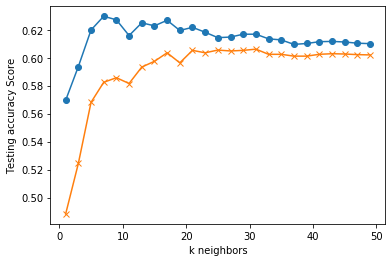

In [70]:
train_scores = []
test_scores = []

k_range = range(1, 50, 2)

for k in k_range:
    # create the classifier for each value of K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    #Score with both test and train data
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    #append the scores to our list of scores
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

plt.plot(k_range, train_scores, marker='o')
plt.plot(k_range, test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Text(0, 0.5, 'Training Accuracy')

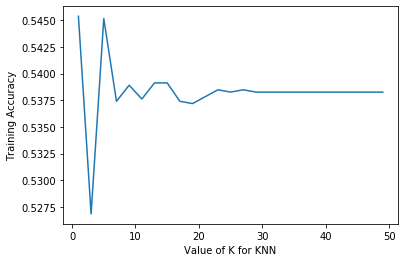

In [64]:
plt.plot(k_range, train_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Training Accuracy')

Text(0, 0.5, 'Testing Accuracy')

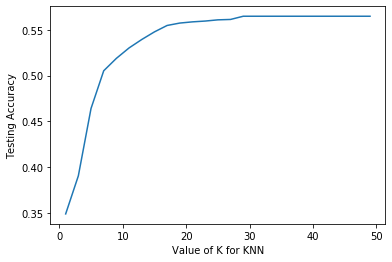

In [65]:
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [67]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test, y_test))

k=3 Test Acc: 0.565


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [51]:
from sklearn import metrics
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6052173913043478


In [ ]:
import pickle

In [ ]:
filename="KNN_HealthCenter"

In [52]:
new_hc_data = [[20,474,12,23,35,5,89,80000,16,10]]
predicted_class = knn.predict(new_hc_data)
print(predicted_class)

[11]
